&emsp;&emsp;In general, a weighted moving average is calculated as 
$$ y_{t} = \frac{ \sum_{i=0}^{t} w_{i}x_{t-i} }{ \sum_{i=0}^{t} w_{i}} $$    
where $ x_{i} $ is the input, $ y_{i}  $ is the result and $ w_{i} $ are the wights.
the EW functions support two variants of exponential weights. the default, adjust=True,uses the weights $ w_{i} = (1- \alpha)^i $ which gives    
$$ y_{t} = \frac{ x_{t} + (1-\alpha)x_{t-1} + (1-\alpha)^{2}x_{t-2} +...+ (1-\alpha)^{t}x_{0}}{ 1 + (1-\alpha) + (1-\alpha)^2 + ... + (1-\alpha)^t } $$    


&emsp;&emsp;when adjust=False is specified, moving averages are calculated as    
\begin{equation} 
\begin{split}%加在equation环境中使之有公式编号
		y_{0}&=x_{0}\\
		y_{t}&=(1-\alpha)y_{t-1} + \alpha x_{t}
\end{split} 
\end{equation}  

\begin{equation} 
\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}
\end{equation}  

which is equivalent to using weights  
\begin{equation} 
\begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t.
\end{cases}\end{split}
\end{equation}  


&emsp;&emsp;The difference between the above two variants arises because we are dealing with series which have finite history. Consider a series of infinite history, with `adjust=True`:     
\begin{equation} 
y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...}
{1 + (1 - \alpha) + (1 - \alpha)^2 + ...}
\end{equation}  

Noting that the denominator is a geometric series with initial term equal to 1 and a ratio of$ 1 - \alpha$ we have   
\begin{equation} 
\begin{split}y_t &= \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...}
{\frac{1}{1 - (1 - \alpha)}}\\
&= [x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...] \alpha \\
&= \alpha x_t + [(1-\alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...]\alpha \\
&= \alpha x_t + (1 - \alpha)[x_{t-1} + (1 - \alpha) x_{t-2} + ...]\alpha\\
&= \alpha x_t + (1 - \alpha) y_{t-1}\end{split}
\end{equation}  


&emsp;&emsp;which is the same expression as `adjust=False` above and therefore shows the equivalence of the two variants for infinite series. When `adjust=False`, we have $  y_0 = x_0$and$ y_t = \alpha x_t + (1 - \alpha) y_{t-1} $. Therefore, there is an assumption that $ x_{0} $ is not an ordinary value but rather an exponentially weighted moment of the infinite series up to that point.    


&emsp;&emsp;One must have $ 0 < \alpha \leq 1$, and while since version 0.18.0 it has been possible to pass αα directly, it’s often easier to think about either the **span**, **center of mass (com)** or **half-life** of an EW moment:    
\begin{equation}
\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}
\end{equation}<br/>
One must specify precisely one of **span**, **center of mass**, **half-life** and **alpha** to the EW functions:

- **Span** corresponds to what is commonly called an “N-day EW moving average”.
- **Center of mass** has a more physical interpretation and can be thought of in terms of span: $ c = (s - 1) / 2 $.
- **Half-life** is the period of time for the exponential weight to reduce to one half.
- **Alpha** specifies the smoothing factor directly.

In [2]:
import  pandas as pd
import  matplotlib.pyplot as plt

In [3]:
close_px_all = pd.read_csv('stock_px_2.csv',
                           parse_dates=True, index_col=0)

In [4]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [5]:
aapl_px = close_px.AAPL['2006':'2007']
aapl_px.head()

2006-01-03    74.75
2006-01-04    74.97
2006-01-05    74.38
2006-01-06    76.30
2006-01-09    76.05
Name: AAPL, dtype: float64

In [6]:
ma60 = aapl_px.rolling(30, min_periods=20).mean() # 一次移动平均
ewma30 = aapl_px.ewm(span=30).mean() # 指数平均平滑法(取第一期的实际值为初值)
'''
com : float, optional
    Specify decay in terms of center of mass, α=1/(1+com), for com≥0.

span : float, optional
    Specify decay in terms of span, α=2/(span+1), for span≥1.

halflife : float, optional
    Specify decay in terms of half-life, α=1−exp(log(0.5)/halflife),for halflife>0.

alpha : float, optional
    Specify smoothing factor α directly, 0<α≤1.
'''
df_empty = pd.DataFrame() # 创建一个空的dataframe
df_empty[1] = ma60
df_empty[2] = ewma30
df_empty

,1,2
2006-01-03,NaN,74.750000
2006-01-04,NaN,74.863667
2006-01-05,NaN,74.691581
2006-01-06,NaN,75.134759
2006-01-09,NaN,75.342998
2006-01-10,NaN,76.422313
2006-01-11,NaN,77.715628
2006-01-12,NaN,78.741466
2006-01-13,NaN,79.720484
2006-01-17,NaN,80.381872


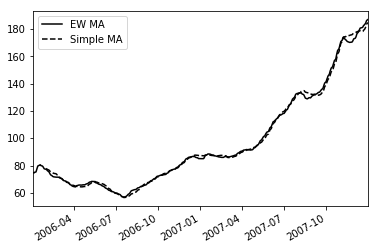

In [7]:
ewma30.plot(style='k-', label='EW MA')
ma60.plot(style='k--', label='Simple MA')
plt.legend()